<a href="https://colab.research.google.com/github/adhalya/Analise_Campanha_Credito/blob/main/An%C3%A1lise_Campanha_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dicionário

*Perguntas Pessoais:*
- **S2A** - Como voce se identifica?
- **S3A** - Quantos anos você tem?
- **S4A** - Em qual estado voce mora?
- **S5A** - Qual sua atual ocupação?
- **S6A** - Qual sua renda media mensal?

*Perguntas Sobre a Marca:*
- **BRAD31** - Quando você pensa em previdência privada qual é a primeira marca que vem a cabeça?
- **BRAD32** - Voce possui algum plano de previdencia privada?
- **BRAD33** - Qual e o tipo de previdencia que voce possui?
- **BRAD34** - Qual percentual do quanto voce ganha voce investe em previdencia?
- **BRAD35** - Com que frequencia voce investe em previdencia?
- **BRAD36** - Qual percentual do quanto voce ganha voce investiria em previdencia?
- **BRAD37** - Com qual frequencia voce investiria na sua previdencia?
- **BRAD38** - Qual seu nivel de conhecimento sobre previdencia privada?
- **BRAD39** - Qual a melhor forma de pagamento para previdencia?
- **BRAD40** - Qual o fator mais importante na hora de contratar previdencia?
- **BRAD41** - Como voce gostaria de contratar previdencia privada?
- **BRAD42** - Qual o seu principal objetivo para fazer um plano de previdencia?
- **BRAD43** - Qual o seu nivel de preocupacao em relacao a golpes ou fraudes ao investir em previdencia?
- **BRAD44** - Qual e o seu nivel de confianca na contratacao digital?
- **BRAD45** - Voce associa previdencia privada a algum bancoassessoria de investimento Se sim qual?
- **BRAD46** - Quais dessas marcas voce se lembra de ter visto em algum anuncio ou comunicacao nos ultimos 6 meses sobre previdencia privada?

*Informações de Cadastro:*
- **user_email** - E-mail utilizado para preenchimento de formulário

*Dataframe sem ajuste (amostra):*
- **df1_inicio** - Dataframe antes da campanha
- **df2_inicio** - Dataframe depois da campanha
- **df_inicio** - Dataframe com antes e depois junto


Dataframe com ajuste (amostra):
- **df1_final** - Dataframe antes da campanha
- **df2_final** - Dataframe depois da campanha
- **df_final** - Dataframe com antes e depois junto

## Bibliotecas / Importação de arquivo

In [108]:
# Bibliotecas de manipulação e tratamento de dados
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
from collections import Counter


In [109]:
df1 = pd.read_csv("https://raw.githubusercontent.com/adhalya/Analise_Campanha_Credito/refs/heads/main/Base%20de%20Dados/BRASILPREV_ANTES.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/adhalya/Analise_Campanha_Credito/refs/heads/main/Base%20de%20Dados/BRASILPREV_AP%C3%93S.csv")

In [110]:
df1.head()

,user_email,BRAD37,BRAD43,BRAD35,BRAD45,S5A,BRAD39,BRAD36,S2A,BRAD38,...,BRAD40,S6A,BRAD34,BRAD31,BRAD32,S4A,BRAD41,S3A,BRAD33,BRAD42
0,01@gmail.com,NaN,NaN,NaN,NaN,Desempregado,NaN,NaN,Feminino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,NaN,NaN,Inss,NaN,Minas Gerais,NaN,Entre 18 e 27 anos,NaN,NaN
1,02@hotmail.com,NaN,NaN,NaN,NaN,Autônomo,NaN,NaN,Masculino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,De R$ 1.000 a R$ 3.000,NaN,não sei,NaN,São Paulo,NaN,Entre 45 e 60 anos,NaN,NaN
2,03@gmail.com,NaN,"Alta preocupação , tenho medo e isso influenci...",NaN,Não,Estudante,NaN,NaN,Masculino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,NaN,NaN,sony,NaN,Espírito Santo,NaN,Entre 18 e 27 anos,NaN,NaN
3,04@gmail.com,NaN,"Alta preocupação , tenho medo e isso influenci...",NaN,Não,Autônomo,NaN,NaN,Prefiro não informar,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,Acima de R$ 8.000,NaN,Prisão domiciliar,NaN,Espírito Santo,NaN,Entre 45 e 60 anos,NaN,NaN
4,05@gmail.com,NaN,"Nenhuma preocupação, confio completamente nas ...",NaN,Não,Estudante,NaN,NaN,Masculino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,NaN,NaN,Privacidade,NaN,São Paulo,NaN,Menos de 18 anos,NaN,NaN


In [111]:
df2.head()

,user_email,BRAD41,BRAD38,BRAD31,BRAD46,BRAD32,BRAD33,S6A,BRAD39,BRAD44,...,BRAD37,BRAD36,BRAD35,BRAD42,BRAD43,S4A,S3A,BRAD34,S2A,BRAD45
0,01@gmail.com,NaN,NaN,NaN,Itaú Previdência|Nenhuma das anteriores,NaN,NaN,NaN,NaN,Confiança moderada,...,NaN,NaN,NaN,NaN,"Preocupação moderada, estou atento, mas ainda ...",NaN,NaN,NaN,NaN,Não
1,02@gmail.com,NaN,NaN,NaN,Caixa Previdência|Bradesco Previdência |XP Pre...,NaN,NaN,NaN,NaN,Confiança alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,Não
2,03@gmail.com,NaN,NaN,Privada,Nenhuma das anteriores,NaN,NaN,NaN,NaN,Confiança muito baixa,...,NaN,NaN,NaN,NaN,"Nenhuma preocupação, confio completamente nas ...",NaN,Entre 28 e 45 anos,NaN,NaN,Não
3,04@uol.com.br,WhatsApp via ChatBot,"Conhecimento muito baixo, já ouvi falar, mas n...",Bb,NaN,Não tenho,NaN,NaN,Boleto,Confiança moderada,...,"Todo mês, como parte do meu orçamento",Até 5%,NaN,Ajudar quem eu amo,"Preocupação moderada, estou atento, mas ainda ...",NaN,NaN,NaN,NaN,Não
4,05@bol.com.br,NaN,"Nenhum conhecimento, nunca ouvi falar sobre pr...","Pode ser uma grande ajuda,para pessoas daninha...",NaN,NaN,NaN,De R$ 1.000 a R$ 3.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,São Paulo,Acima de 60 anos,NaN,Masculino,NaN


## Fase 1: Planejamento

**Revisão dos dados coletados nas duas rodadas de pesquisa, definição das métricas de análise e testes estatísticos apropriados.**

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  1228 non-null   object
 1   BRAD37      790 non-null    object
 2   BRAD43      1108 non-null   object
 3   BRAD35      266 non-null    object
 4   BRAD45      1097 non-null   object
 5   S5A         1223 non-null   object
 6   BRAD39      818 non-null    object
 7   BRAD36      791 non-null    object
 8   S2A         1221 non-null   object
 9   BRAD38      1224 non-null   object
 10  BRAD46      1104 non-null   object
 11  BRAD44      1104 non-null   object
 12  BRAD40      814 non-null    object
 13  S6A         817 non-null    object
 14  BRAD34      266 non-null    object
 15  BRAD31      1225 non-null   object
 16  BRAD32      1060 non-null   object
 17  S4A         1220 non-null   object
 18  BRAD41      810 non-null    object
 19  S3A         1221 non-null   object
 20  BRAD33  

In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  2280 non-null   object
 1   BRAD41      1120 non-null   object
 2   BRAD38      2277 non-null   object
 3   BRAD31      2269 non-null   object
 4   BRAD46      1527 non-null   object
 5   BRAD32      1511 non-null   object
 6   BRAD33      467 non-null    object
 7   S6A         1199 non-null   object
 8   BRAD39      1143 non-null   object
 9   BRAD44      1539 non-null   object
 10  S5A         2276 non-null   object
 11  BRAD40      1131 non-null   object
 12  BRAD37      1028 non-null   object
 13  BRAD36      1032 non-null   object
 14  BRAD35      460 non-null    object
 15  BRAD42      1113 non-null   object
 16  BRAD43      1537 non-null   object
 17  S4A         2275 non-null   object
 18  S3A         2275 non-null   object
 19  BRAD34      463 non-null    object
 20  S2A     

Comparando a quantidade de respostas em cada dataset, notou-se que as perguntas com menores quantidades de respostas em ambas campanhas são as que se referem ao tipo de previdência (**BRAD33**), a porcentagem de investimento em previdência com base no salário (**BRAD34**), a frequência de investimento em previdência (**BRAD35**).

Na campanha 1 (*pd1*) as perguntas que se referem a melhor forma de pagamento (**BRAD39**), ao fator mais importante durante a contratação (**BRAD40**), como gostaria de contratar a previdência (**BRAD41**) e qual o objetivo na contratação de previdência (**BRAD42**).

Retirando as perguntas com menores taxas de respostas citadas acima, as outras perguntas possuem a mediana de 439 respostas para a campanha 1 (*pd1*) e 288 respostas para a campanha 2 (*pd2*).


##### Entendo os dados de cada coluna

In [114]:
BRAD31 = df1.value_counts('BRAD31').sort_values(ascending=False)
BRAD31

,count
BRAD31,
Bradesco,85
Nenhuma,71
Não sei,58
Caixa,48
Nike,44
Itaú,39
Inss,31
Banco do Brasil,22
Itau,20


In [115]:
BRAD32 = df1.value_counts('BRAD32')
BRAD32

,count
BRAD32,
Não tenho,696
"Sim, eu mesmo decidi ter",170
"Tinha, mas cancelei",99
"Sim, a minha empresa oferece como benefício",95


## Fase 2: Preparação dos dados

**Consolidação das informações, limpeza e tratamento dos dados extraídos das planilhas "brasil_prev1" e "brasil_prev2".**

### Filtrando e declarado dataframes iniciais

In [116]:
emails_em_comum = set(df1['user_email']) & set(df2['user_email'])

df1_filtrado = df1[df1['user_email'].isin(emails_em_comum)].copy()
df2_filtrado = df2[df2['user_email'].isin(emails_em_comum)].copy()


In [117]:
df_inicio = pd.merge(
    df1_filtrado[['user_email', 'BRAD31']],
    df2_filtrado[['user_email', 'BRAD31']],
    on='user_email',
    suffixes=('_antes', '_depois')
)

In [118]:
df_inicio['mudou'] = df_inicio['BRAD31_antes'] != df_inicio['BRAD31_depois']
df_inicio['mudou'].value_counts()

,count
mudou,
True,861
False,14


In [119]:
df_inicio[df_inicio['mudou']][['user_email', 'BRAD31_antes', 'BRAD31_depois']]

,user_email,BRAD31_antes,BRAD31_depois
0,01@gmail.com,Inss,NaN
1,03@gmail.com,sony,Privada
2,06@gmail.com,Não me lembro,Não sei
3,07@gmail.com,Casa,Sla
4,08@gmail.com,NS,Nada
5,09@gmail.com,Nenhuma,Não sei
6,10@gmail.com,Privic,Nike
7,12@gmail.com,Nada,Não sei
8,13@gmail.com,adidas,Nike
9,14@gmail.com,Social,Jogos


In [120]:
# Criar DataFrames isolados para BRAD31_antes e BRAD31_depois
df1_inicio = df_inicio[['user_email', 'BRAD31_antes']].copy()
df2_inicio = df_inicio[['user_email', 'BRAD31_depois']].copy()

# Renomear as colunas para manter consistência
df1_inicio = df1_inicio.rename(columns={'BRAD31_antes': 'BRAD31'})
df2_inicio = df2_inicio.rename(columns={'BRAD31_depois': 'BRAD31'})

# Exibir os DataFrames resultantes
print("df1_final:")
print(df1_inicio)

print("\ndf2_final:")
print(df2_inicio)

df1_final:
           user_email                                             BRAD31
0        01@gmail.com                                               Inss
1        03@gmail.com                                               sony
2        06@gmail.com                                      Não me lembro
3        07@gmail.com                                               Casa
4        08@gmail.com                                                 NS
5        09@gmail.com                                            Nenhuma
6        10@gmail.com                                             Privic
7        12@gmail.com                                               Nada
8        13@gmail.com                                             adidas
9        14@gmail.com                                             Social
10       15@gmail.com                                             Eu\r\n
11       16@gmail.com                                                Fox
12       17@gmail.com                   

No total são 174 pessoas que participaram de ambos os formulários. Como temos diversas respostas em diferentes formatos, precisamos realizar um tratamento, retirando símbolos indevidos e formatanto as respostas no mesmo padrão de escrita (maiúsculas).

In [121]:
pd.set_option('display.max_rows', None)
df_merge_valores = df_inicio.value_counts()
df_merge_valores

,,,,count
user_email,BRAD31_antes,BRAD31_depois,mudou,
99@gmail.com,Bradesco,Nenhuma,True,1
03@gmail.com,sony,Privada,True,1
06@gmail.com,Não me lembro,Não sei,True,1
07@gmail.com,Casa,Sla,True,1
08@gmail.com,NS,Nada,True,1
09@gmail.com,Nenhuma,Não sei,True,1
1000@gmail.com,XP,INSS,True,1
97@gmail.com,Bradesco,Não sei,True,1
978@gmail.com,Não,Caixa,True,1


### Declarando dataframes após a limpeza

#### Limpeza dos dados BRAD31

In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  2280 non-null   object
 1   BRAD41      1120 non-null   object
 2   BRAD38      2277 non-null   object
 3   BRAD31      2269 non-null   object
 4   BRAD46      1527 non-null   object
 5   BRAD32      1511 non-null   object
 6   BRAD33      467 non-null    object
 7   S6A         1199 non-null   object
 8   BRAD39      1143 non-null   object
 9   BRAD44      1539 non-null   object
 10  S5A         2276 non-null   object
 11  BRAD40      1131 non-null   object
 12  BRAD37      1028 non-null   object
 13  BRAD36      1032 non-null   object
 14  BRAD35      460 non-null    object
 15  BRAD42      1113 non-null   object
 16  BRAD43      1537 non-null   object
 17  S4A         2275 non-null   object
 18  S3A         2275 non-null   object
 19  BRAD34      463 non-null    object
 20  S2A     

In [123]:
import pandas as pd
import re

# Lista de nomes para filtrar
nomes_filtrar = [
    'INSS', 'XP', 'ITAÚ', 'ICATU', 'BRADESCO', 'CAIXA', 'BANCO DO BRASIL', 'BRASILPREV',
    'RICO', 'UNIMED', 'PORTO SEGURO', 'SANTANDER', 'MAPFRE', 'PETROS', 'PETROBRAS',
    'SAFRA', 'ALLIANZ', 'KINEA', 'GRÃO', 'ARCA', 'VWPP', 'PREVIDENT SENIOR',
    'ALLOS', 'C6 BANK', 'ALASKA PREVIDÊNCIA', 'ONZE', 'POSITIVO', 'MERCADO PAGO', 'INTER', 'ALLOS', 'ALASKA'
]

# Dicionário de sinônimos e variações
sinonimos = {
    'ITAU': 'ITAÚ',
    'CAIXA ECONOMICA FEDERAL': 'CAIXA',
    'CAIXA ECONÔMICA FEDERAL': 'CAIXA',
    'CAIXA ECONÔMICA': 'CAIXA',
    'XP INVESTIMENTOS': 'XP',
    'BB': 'BRASILPREV',
    'C6': 'C6 BANK',
    'BRADESCO SEGUROS': 'BRADESCO',
    'BRASIL PREVIDENCIA': 'BRASILPREV',
    'CAIXA ECONOMICA': 'CAIXA',
    'AILOS': 'ALLOS',
    'CAIXA PREVIDENCIA': 'CAIXA',
    'BRASIL PREV': 'BRASILPREV',
    'ITÁU': 'ITAÚ',
    'BRADESCO PREVIDENCIA': 'BRADESCO',
    'GRAO': 'GRÃO',
    'ITAÚ PREVIDÊNCIA': 'ITAÚ',
    'BANCO DO BRASIL': 'BRASILPREV'
}

# Função para padronizar os textos
def padronizar_texto(texto):
    if pd.isna(texto):  # Verificar se o valor é nulo
        return texto
    texto = str(texto).upper().strip()
    # Remover caracteres especiais e múltiplos espaços
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Função para mapear sinônimos
def mapear_sinonimos(texto):
    if pd.isna(texto):
        return texto
    texto = str(texto)
    for chave, valor in sinonimos.items():
        if chave in texto:
            return valor
    return texto

# Função para filtrar e substituir por "OUTROS"
def filtrar_nomes(texto):
    if pd.isna(texto):
        return texto
    # Ignorar se for número puro (ex: "123", "2024")
    if texto.isdigit():
        return 'OUTROS'
    if texto in nomes_filtrar:
        return texto
    else:
        return 'OUTROS'

# Função para processar uma coluna
def processar_coluna(coluna):
    coluna_padronizada = coluna.apply(padronizar_texto)
    coluna_mapeada = coluna_padronizada.apply(mapear_sinonimos)
    coluna_filtrada = coluna_mapeada.apply(filtrar_nomes)
    return coluna_filtrada



# Criar um novo DataFrame para armazenar os dados processados
df_final = df_inicio.copy()

# Aplicar o processamento às colunas desejadas
df_final['BRAD31_antes'] = processar_coluna(df_final['BRAD31_antes'])
df_final['BRAD31_depois'] = processar_coluna(df_final['BRAD31_depois'])

# Exibir o DataFrame resultante
print(df_final[['BRAD31_antes', 'BRAD31_depois']])

         BRAD31_antes BRAD31_depois
0                INSS           NaN
1              OUTROS        OUTROS
2              OUTROS        OUTROS
3              OUTROS        OUTROS
4              OUTROS        OUTROS
5              OUTROS        OUTROS
6              OUTROS        OUTROS
7              OUTROS        OUTROS
8              OUTROS        OUTROS
9              OUTROS        OUTROS
10             OUTROS        OUTROS
11             OUTROS        OUTROS
12               INSS        OUTROS
13             OUTROS        OUTROS
14             OUTROS        OUTROS
15               INSS          ITAÚ
16             OUTROS        OUTROS
17             OUTROS        OUTROS
18             OUTROS        OUTROS
19             OUTROS          ITAÚ
20             OUTROS    BRASILPREV
21             OUTROS        OUTROS
22             OUTROS        OUTROS
23             OUTROS          INSS
24             OUTROS         CAIXA
25             OUTROS        OUTROS
26             OUTROS       

In [124]:
print(df_final.columns)


Index(['user_email', 'BRAD31_antes', 'BRAD31_depois', 'mudou'], dtype='object')


In [125]:
# Criar DataFrames isolados para BRAD31_antes e BRAD31_depois
df1_final = df_final[['user_email', 'BRAD31_antes']].copy()
df2_final = df_final[['user_email', 'BRAD31_depois']].copy()

# Renomear as colunas para manter consistência
df1_final = df1_final.rename(columns={'BRAD31_antes': 'BRAD31'})
df2_final = df2_final.rename(columns={'BRAD31_depois': 'BRAD31'})

# Exibir os DataFrames resultantes
print("df1_final:")
print(df1_final)

print("\ndf2_final:")
print(df2_final)

df1_final:
           user_email            BRAD31
0        01@gmail.com              INSS
1        03@gmail.com            OUTROS
2        06@gmail.com            OUTROS
3        07@gmail.com            OUTROS
4        08@gmail.com            OUTROS
5        09@gmail.com            OUTROS
6        10@gmail.com            OUTROS
7        12@gmail.com            OUTROS
8        13@gmail.com            OUTROS
9        14@gmail.com            OUTROS
10       15@gmail.com            OUTROS
11       16@gmail.com            OUTROS
12       17@gmail.com              INSS
13       18@gmail.com            OUTROS
14       19@gmail.com            OUTROS
15       20@gmail.com              INSS
16       21@gmail.com            OUTROS
17       22@gmail.com            OUTROS
18       24@gmail.com            OUTROS
19       25@gmail.com            OUTROS
20       26@gmail.com            OUTROS
21       29@gmail.com            OUTROS
22       30@gmail.com            OUTROS
23       32@gmail.com        

Para facilitar a análise dos dados na etapa de análise, foi necessário realizar o tratamento dos dados. As respostas que continham instituições que fornecem previdência foram mantidas com o nome de suas instituições, já as respostas aleatórias, foram consideradas como *OUTROS*, podendo posteriormente serem excluídas das análises. As respostas que continham *BANCO DO BRASIL* foram transformadas em *BRASILPREV* que é o nome oficial da instituição de previdência que representa o *BANCO DO BRASIL*.


Para manter a consistência dos dados, foi separado os dataframes com os dados tratados em **df1_final** e **df2_final**, onde o objetivo é mantê-los com todas as variáveis com o devido tratamento.

#### Verificando a limpeza dos dados (antes e após limpeza)

Na linha de código a seguir vai ser criada um dataframe que recebe todas as variáveis antes e após a limpeza para verificar se todas as instituições passaram pelo devido tratamento.

In [126]:
# Criar um DataFrame de comparação
df_comparacao = pd.DataFrame({
    'user_email': df_inicio['user_email'],  # Manter o e-mail como referência
    'BRAD31_antes_inicio': df1_inicio['BRAD31'],  # BRAD31_antes antes da limpeza
    'BRAD31_depois_inicio': df2_inicio['BRAD31'],  # BRAD31_depois antes da limpeza
    'BRAD31_antes_final': df1_final['BRAD31'],  # BRAD31_antes após a limpeza
    'BRAD31_depois_final': df2_final['BRAD31']  # BRAD31_depois após a limpeza
})

# Exibir o DataFrame de comparação
df_comparacao

,user_email,BRAD31_antes_inicio,BRAD31_depois_inicio,BRAD31_antes_final,BRAD31_depois_final
0,01@gmail.com,Inss,NaN,INSS,NaN
1,03@gmail.com,sony,Privada,OUTROS,OUTROS
2,06@gmail.com,Não me lembro,Não sei,OUTROS,OUTROS
3,07@gmail.com,Casa,Sla,OUTROS,OUTROS
4,08@gmail.com,NS,Nada,OUTROS,OUTROS
5,09@gmail.com,Nenhuma,Não sei,OUTROS,OUTROS
6,10@gmail.com,Privic,Nike,OUTROS,OUTROS
7,12@gmail.com,Nada,Não sei,OUTROS,OUTROS
8,13@gmail.com,adidas,Nike,OUTROS,OUTROS
9,14@gmail.com,Social,Jogos,OUTROS,OUTROS


#### Verificando a quantidade de valores antes e após a campanha

In [127]:
df1_final['BRAD31'].value_counts()

,count
BRAD31,
OUTROS,588
BRADESCO,68
ITAÚ,48
CAIXA,48
BRASILPREV,41
INSS,38
XP,12
SANTANDER,6
INTER,4


In [128]:
df2_final['BRAD31'].value_counts()

,count
BRAD31,
OUTROS,629
INSS,55
CAIXA,48
BRADESCO,41
ITAÚ,40
BRASILPREV,35
XP,8
PETROBRAS,3
INTER,3


Antes da campanha, foram citadas 24 instituições, enquanto após a campanha, foram citadas 19 instituições.

In [129]:
# Filtrando as respostas que possuem pelo menos o nome de uma instituição financeira
df_final = df_final[
    (df_final['BRAD31_antes'] != 'OUTROS') |
    (df_final['BRAD31_depois'] != 'OUTROS')
]

# Exibir o DataFrame filtrado
print(df_final[['BRAD31_antes', 'BRAD31_depois']])

         BRAD31_antes BRAD31_depois
0                INSS           NaN
12               INSS        OUTROS
15               INSS          ITAÚ
19             OUTROS          ITAÚ
20             OUTROS    BRASILPREV
23             OUTROS          INSS
24             OUTROS         CAIXA
26             OUTROS         CAIXA
27             OUTROS          INSS
29         BRASILPREV      BRADESCO
32             OUTROS        PETROS
35             OUTROS          ITAÚ
36             OUTROS          RICO
39             OUTROS         CAIXA
42             OUTROS          INSS
45               INSS        OUTROS
47             OUTROS          INSS
50           BRADESCO        OUTROS
52             OUTROS      BRADESCO
54             OUTROS          INSS
71         BRASILPREV        OUTROS
72             OUTROS         INTER
74           BRADESCO        OUTROS
75               INSS        OUTROS
76           BRADESCO        OUTROS
77             OUTROS         CAIXA
78                 XP       

## Fase 3: Análise

**Extração de insights nos dois conjuntos de dados para compará-los, identificando padrões, mudanças na percepção da marca e outros fatores influentes ao longo do período analisado. Análise detalhada dos dados, destacando tendências e fatores determinantes no impacto da campanha.**

#### Tabela de Frequências

#### Tabela de Frequência de Antes da Campanha

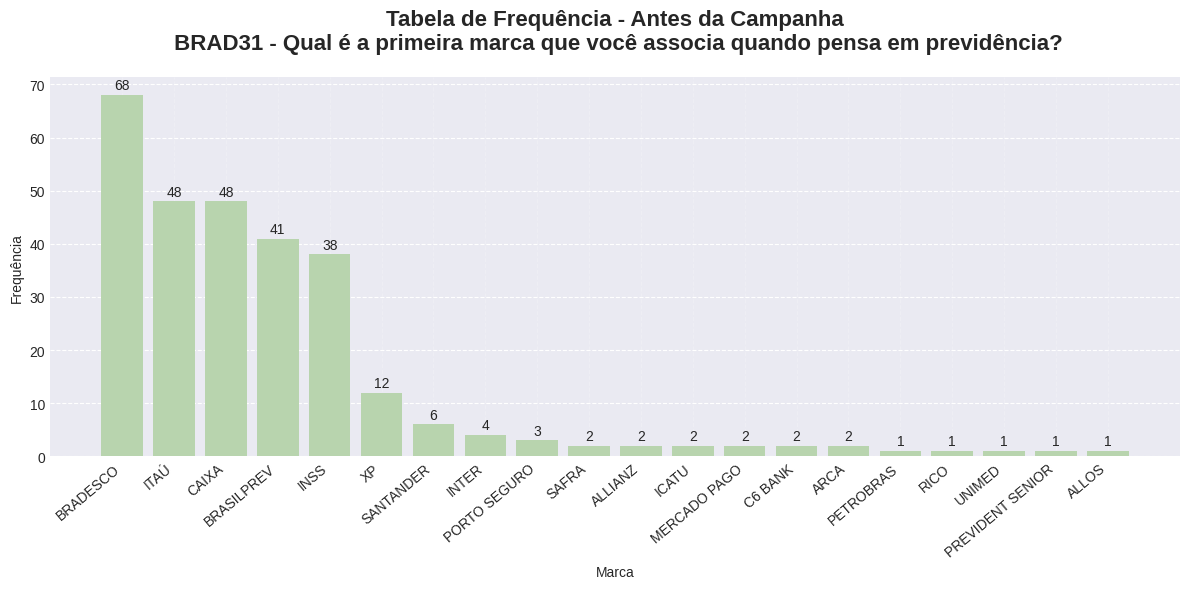

In [130]:
# @title
# Filtrar para remover a categoria "OUTROS"
respostas_df1_filtradas = df1_final[df1_final['BRAD31'] != 'OUTROS']['BRAD31']

# Contar a frequência das respostas filtradas
contagem_df1 = respostas_df1_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_20 = contagem_df1.head(20)

# Criar o gráfico de barras
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20.index, top_20.values, color='#b8d4ae')

# Adicionar rótulos alinhados à direita
plt.xticks(range(len(top_20.index)), top_20.index, rotation=40, ha='right')

# Adicionar os valores de frequência acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x (centro da barra)
        height + 0.5,  # Posição y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequência)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=10
    )

# Adicionar título e rótulos dos eixos
plt.title("Tabela de Frequência - Antes da Campanha\n BRAD31 - Qual é a primeira marca que você associa quando pensa em previdência?", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Marca")
plt.ylabel("Frequência")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.grid(axis='x', linestyle='--', alpha=0.2)

# Exibir o gráfico
plt.show()

#### Tabela de Frequência de Após a Campanha

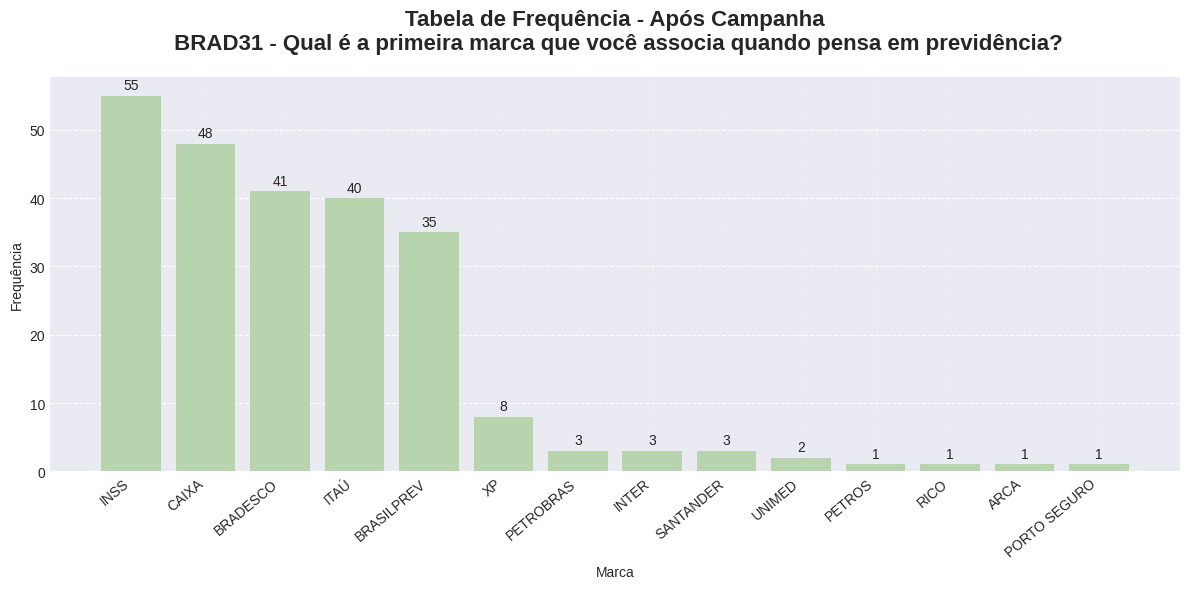

In [131]:
# @title
# Filtrar para remover a categoria "OUTROS"
respostas_df2_filtradas = df2_final[df2_final['BRAD31'] != 'OUTROS']['BRAD31']

# Contar a frequência das respostas filtradas
contagem_df2 = respostas_df2_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_20_2 = contagem_df2.head(20)

# Criar o gráfico de barras
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_2.index, top_20_2.values, color='#b8d4ae')

# Adicionar rótulos alinhados à direita
plt.xticks(range(len(top_20_2.index)), top_20_2.index, rotation=40, ha='right')

# Adicionar os valores de frequência acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x (centro da barra)
        height + 0.5,  # Posição y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequência)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=10
    )

# Adicionar título e rótulos dos eixos
plt.title("Tabela de Frequência - Após Campanha\n BRAD31 - Qual é a primeira marca que você associa quando pensa em previdência?", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Marca")
plt.ylabel("Frequência")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.grid(axis='x', linestyle='--', alpha=0.2)

# Exibir o gráfico
plt.show()

#### Tabela de Frequência de ambos questionários

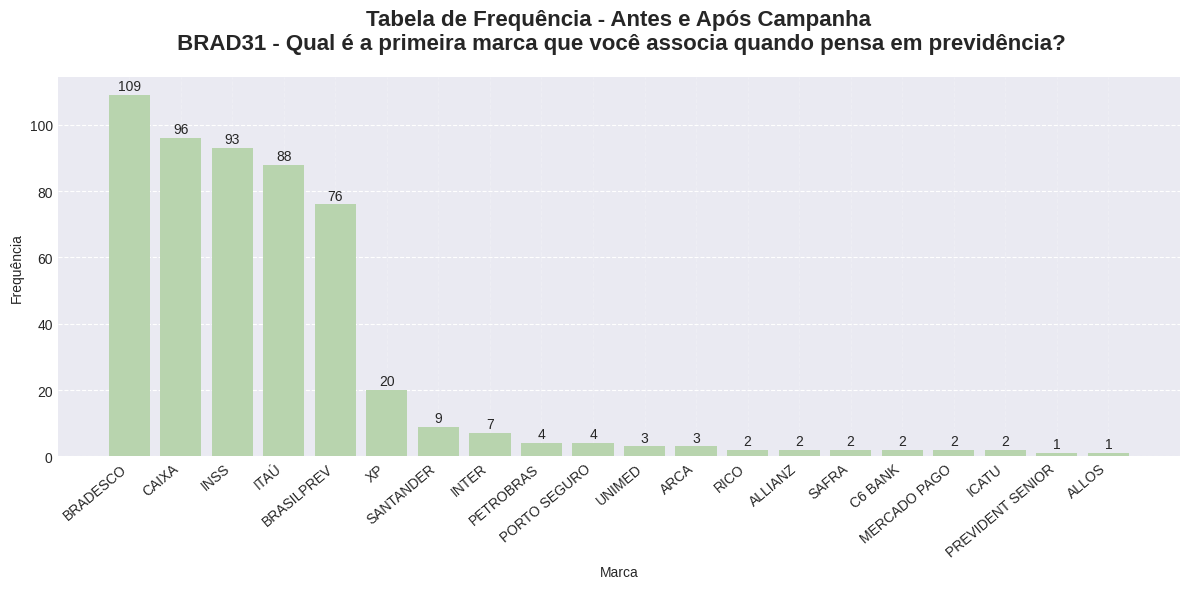

In [132]:
# @title
# Concatenar as duas colunas e contar todas as respostas
todas_respostas = pd.concat([df1_final['BRAD31'], df2_final['BRAD31']])

# Filtrar para remover a categoria "OUTROS"
todas_respostas_filtradas = todas_respostas[todas_respostas != 'OUTROS']

# Contar a frequência das respostas filtradas
contagem_geral = todas_respostas_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_20 = contagem_geral.head(20)

# Criar o gráfico de barras
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20.index, top_20.values, color='#b8d4ae')

# Adicionar rótulos alinhados à direita
plt.xticks(range(len(top_20.index)), top_20.index, rotation=40, ha='right')

# Adicionar os valores de frequência acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x (centro da barra)
        height + 0.5,  # Posição y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequência)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=10
    )

# Adicionar título e rótulos dos eixos
plt.title("Tabela de Frequência - Antes e Após Campanha\n BRAD31 - Qual é a primeira marca que você associa quando pensa em previdência?", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Marca")
plt.ylabel("Frequência")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.grid(axis='x', linestyle='--', alpha=0.2)

# Exibir o gráfico
plt.show()

### Teste de McNemar

In [133]:
# @title
# Criar colunas booleanas: citou ou não "BRASILPREV"
df1_final['citou_antes'] = df1_final['BRAD31'] == 'BRASILPREV'
df2_final['citou_depois'] = df2_final['BRAD31'] == 'BRASILPREV'

# Tabela de contingência
contingencia = pd.crosstab(df1_final['citou_antes'], df2_final['citou_depois'])
print("\nTabela de contingência:")
print(contingencia)

# Aplicar teste de McNemar
resultado = mcnemar(contingencia, exact=False)
print(f"\nEstatística do teste: {resultado.statistic}")
print(f"Valor-p: {resultado.pvalue:.4f}")

# Interpretação
if resultado.pvalue < 0.05:
    print("Diferença significativa: a campanha pode ter influenciado as respostas.")
else:
    print("Sem evidência de diferença significativa nas respostas.")


Tabela de contingência:
citou_depois  False  True 
citou_antes               
False           802     32
True             38      3

Estatística do teste: 0.35714285714285715
Valor-p: 0.5501
Sem evidência de diferença significativa nas respostas.


A tabela de contingência mostra que 218 pessoas não citaram a BRASILPREV nem antes nem depois da campanha, enquanto 9 pessoas que não citavam a BRASILPREV antes passaram a mencioná-la após a campanha. Por outro lado, 7 pessoas que citavam a BRASILPREV antes deixaram de fazê-lo depois da campanha, e 8 pessoas continuaram citando a BRASILPREV tanto antes quanto depois.

O teste de McNemar, que avalia a significância estatística dessas mudanças, resultou em uma estatística de teste de 0,0625 e um valor-p de 0,8026. Como o valor-p é maior que 0,05, não há evidência estatística para afirmar que a campanha causou uma mudança significativa nas respostas relacionadas à BRASILPREV. Isso significa que as variações observadas nas respostas antes e depois da campanha podem ser atribuídas ao acaso, e não a um efeito real da campanha.

Para resumir, a campanha não parece ter tido um impacto significativo na percepção ou menção da BRASILPREV. As mudanças observadas foram relativamente pequenas e não são estatisticamente relevantes. Portanto, não há evidência suficiente para concluir que a campanha influenciou de forma relevante as respostas dos participantes em relação à BRASILPREV. Para melhorar a eficácia da campanha, pode ser útil revisar a estratégia e considerar outros fatores, como o alcance e o engajamento, ou até mesmo segmentar a análise para identificar grupos específicos que possam ter respondido de maneira diferente.

Contagem de Antes e depois dos nomes mais frequentes


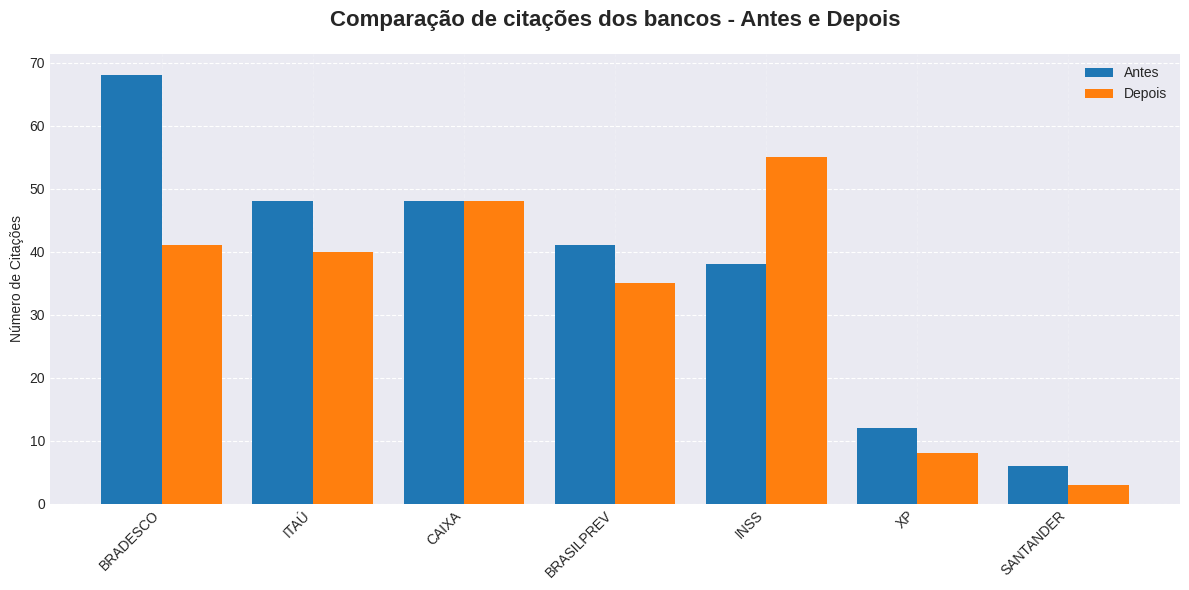

In [134]:
# @title

# Supondo que df_final já contém as colunas normalizadas 'BRAD31_antes' e 'BRAD31_depois'
df_comparado = df_final[['BRAD31_antes', 'BRAD31_depois']].copy()

# Contar ocorrências
contagem_antes = Counter(df_comparado['BRAD31_antes'])
contagem_depois = Counter(df_comparado['BRAD31_depois'])

# Unir todos os nomes únicos
todos_bancos = set(contagem_antes) | set(contagem_depois)

# Organizar dados em DataFrame
dados = {
    'Banco': [],
    'Antes': [],
    'Depois': []
}

for banco in todos_bancos:
    antes = contagem_antes.get(banco, 0)
    depois = contagem_depois.get(banco, 0)

    # Filtrar bancos com mais de 4 citações no total e excluir a categoria "OUTROS"
    if (antes > 4 or depois > 4) and banco != "OUTROS":
        dados['Banco'].append(banco)
        dados['Antes'].append(antes)
        dados['Depois'].append(depois)

# Criar DataFrame filtrado
df_plot = pd.DataFrame(dados)
df_plot = df_plot.sort_values(by='Antes', ascending=False)

# Gráfico de barras lado a lado
x = range(len(df_plot))
bar_width = 0.4

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], df_plot['Antes'], width=bar_width, label='Antes')
plt.bar([i + bar_width/2 for i in x], df_plot['Depois'], width=bar_width, label='Depois')
plt.xticks(x, df_plot['Banco'], rotation=45, ha='right')
plt.ylabel("Número de Citações")
plt.title("Comparação de citações dos bancos - Antes e Depois", fontsize=16, pad=20, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.grid(axis='x', linestyle='--', alpha=0.2)
plt.show()

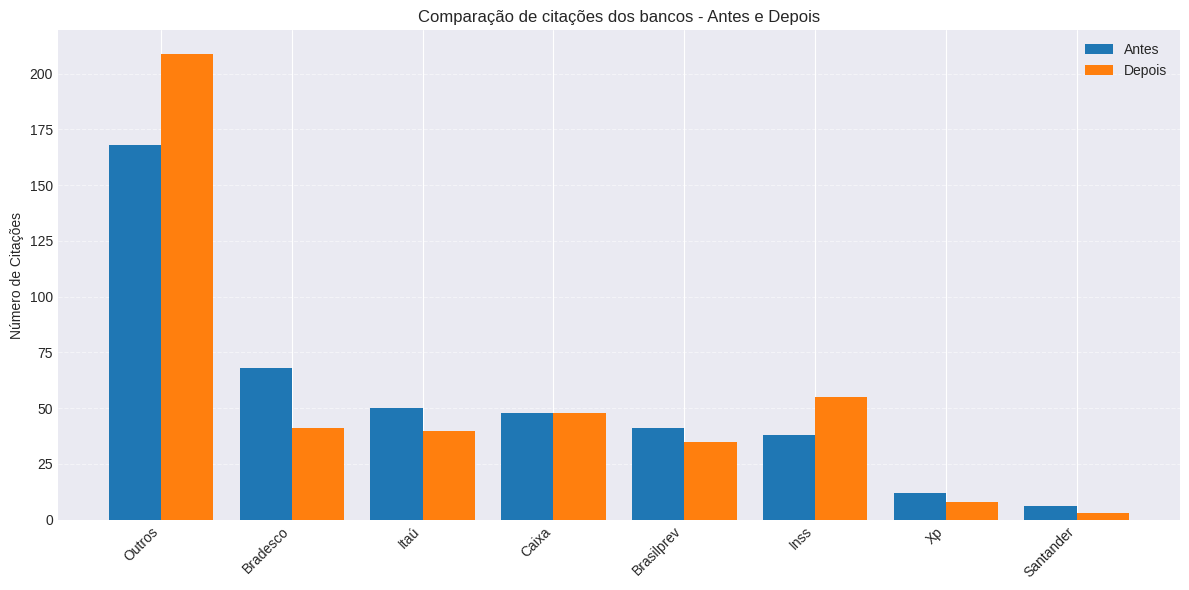

In [135]:
# @title

# Função para normalizar os nomes dos bancos
def normalizar_banco(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    if any(p in texto for p in ['banco do brasil', 'bb', 'dataprev']):
        return 'Banco do Brasil / Dataprev'
    elif 'brasilprev' in texto:
        return 'Brasilprev'
    elif 'itau' in texto or 'icatu' in texto:
        return 'Itaú'
    elif 'santander' in texto:
        return 'Santander'
    elif 'caixa' in texto:
        return 'Caixa'
    else:
        return texto.strip().title()  # Capitaliza outros nomes genéricos

# Criar df_comparado a partir do df_final, pegando só as colunas que você quer comparar
df_comparado = df_final[['BRAD31_antes', 'BRAD31_depois']].copy()

# Aplicar normalização nas colunas de interesse
df_comparado['banco_antes'] = df_comparado['BRAD31_antes'].apply(normalizar_banco)
df_comparado['banco_depois'] = df_comparado['BRAD31_depois'].apply(normalizar_banco)

# Contar ocorrências
contagem_antes = Counter(df_comparado['banco_antes'])
contagem_depois = Counter(df_comparado['banco_depois'])

# Unir todos os nomes únicos
todos_bancos = set(contagem_antes) | set(contagem_depois)

# Organizar dados em DataFrame
dados = {
    'Banco': [],
    'Antes': [],
    'Depois': []
}

for banco in todos_bancos:
    antes = contagem_antes.get(banco, 0)
    depois = contagem_depois.get(banco, 0)

    # Filtrar bancos com mais de 4 citações no total
    if antes > 4 or depois > 4:
        dados['Banco'].append(banco)
        dados['Antes'].append(antes)
        dados['Depois'].append(depois)

# Criar DataFrame filtrado
df_plot = pd.DataFrame(dados)
df_plot = df_plot.sort_values(by='Antes', ascending=False)

# Gráfico de barras lado a lado
x = range(len(df_plot))
bar_width = 0.4

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], df_plot['Antes'], width=bar_width, label='Antes')
plt.bar([i + bar_width/2 for i in x], df_plot['Depois'], width=bar_width, label='Depois')
plt.xticks(x, df_plot['Banco'], rotation=45, ha='right')
plt.ylabel("Número de Citações")
plt.title("Comparação de citações dos bancos - Antes e Depois")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Análise de sexo por pesquisa

In [136]:
emails_em_comum = set(df1['user_email']) & set(df2['user_email'])

df1_filtrado = df1[df1['user_email'].isin(emails_em_comum)].copy()
df2_filtrado = df2[df2['user_email'].isin(emails_em_comum)].copy()

# Renomear as colunas de BRAD31
df1_filtrado = df1_filtrado.rename(columns={'BRAD31': 'BRAD31_antes'})
df2_filtrado = df2_filtrado.rename(columns={'BRAD31': 'BRAD31_depois'})

# Fazer merge pelas colunas em comum
df_comparado = pd.merge(df1_filtrado[['user_email', 'S2A', 'BRAD31_antes']],
                        df2_filtrado[['user_email', 'BRAD31_depois']],
                        on='user_email',
                        how='inner')

sexo_contagem = df_comparado['S2A'].value_counts(dropna=False)

print("Contagem de participantes por sexo (entre os que responderam as duas rodadas):")
print(sexo_contagem)

print("\nCom percentuais:")
print((sexo_contagem / sexo_contagem.sum() * 100).round(2))


Contagem de participantes por sexo (entre os que responderam as duas rodadas):
S2A
Masculino               545
Feminino                310
Prefiro não informar      9
Outro                     8
NaN                       3
Name: count, dtype: int64

Com percentuais:
S2A
Masculino               62.29
Feminino                35.43
Prefiro não informar     1.03
Outro                    0.91
NaN                      0.34
Name: count, dtype: float64
